Ben Ghertner 2025

Demo notebook showing a simulation of the Lamb dipole.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, base64, pathlib
from IPython.display import HTML

sys.path.append('./src/')

from initial_conditions import lamb_dipole
from poisson import poisson
from animation import animation
from fourier import interp

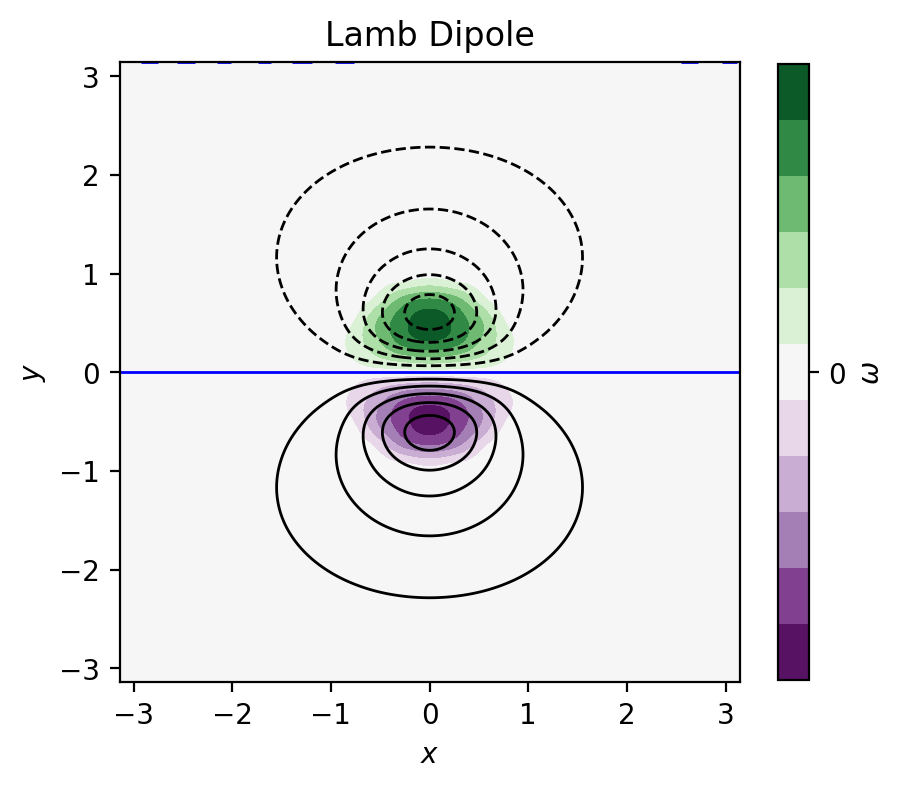

In [2]:
#Lamb Dipole Initial Conditions
N = 32
M = 200
L = 2*np.pi
Uinf = 0.
om0 = lamb_dipole(Lx=L, Ly=L, Nx=N, Ny=N)
om0_plot = interp(om0, (M,M)).real

#Include periodic points for plotting
om0_perpnt = np.empty((om0_plot.shape[0]+1,om0_plot.shape[1]+1))
om0_perpnt[:-1, :-1] = om0_plot.real
om0_perpnt[-1,:-1] = om0_plot[0,:].real
om0_perpnt[:-1,-1] = om0_plot[:,0].real
om0_perpnt[-1,-1]  = om0_plot[0,0].real

#Grid with periodic points
x = np.linspace(-L/2, L/2, M+1, endpoint=True)
y = np.linspace(-L/2, L/2, M+1, endpoint=True)
xx, yy = np.meshgrid(x, y)

ommax = np.max(np.abs(om0_plot))*(1.1)

psi = poisson(om0, Lx=L, Ly=L, Nx=N, Ny=N, Uinf=Uinf)
psi_plot = interp(psi, (M, M)).real
psi_perpnt = np.empty((psi_plot.shape[0]+1,psi_plot.shape[1]+1))
psi_perpnt[:-1, :-1] = psi_plot
psi_perpnt[-1,:-1] = psi_plot[0,:] - y[0]*Uinf + y[-1]*Uinf
psi_perpnt[:-1,-1] = psi_plot[:,0]
psi_perpnt[-1,-1] =  psi_plot[0,0] - y[0]*Uinf + y[-1]*Uinf

psimax = np.max(np.abs(psi_plot))*(1.1)

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
fig.set_dpi(200)

contf = ax.contourf(xx, yy, om0_perpnt, levels=np.linspace(-ommax, ommax, num=12), cmap='PRGn')
ax.contour(xx, yy, psi_perpnt, levels=np.linspace(0,psimax, num=7)[1:], colors='k', linewidths=1)
ax.contour(xx, yy, psi_perpnt, levels=[0], colors='b', linewidths=1)
ax.contour(xx, yy, psi_perpnt, levels=np.linspace(-psimax, 0, num=7)[:-1], colors='k', linewidths=1)
ax.set_aspect(1.0)
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'Lamb Dipole')
fig.colorbar(contf, label=r'$\omega$', shrink=0.8, ticks=(-10, -5, 0, 5, 10))

plt.show()

In [3]:
ani = animation(om0=om0, dt=np.pi/100, Lx=L, Ly=L, Nx=N, Ny=N, Uinf=Uinf, 
                frames=200, delay=2.0, fps=15, Mx=M, My=M)
ani.save('./demo_output/lamb_dipole.gif', writer="pillow", fps=15)
plt.close()


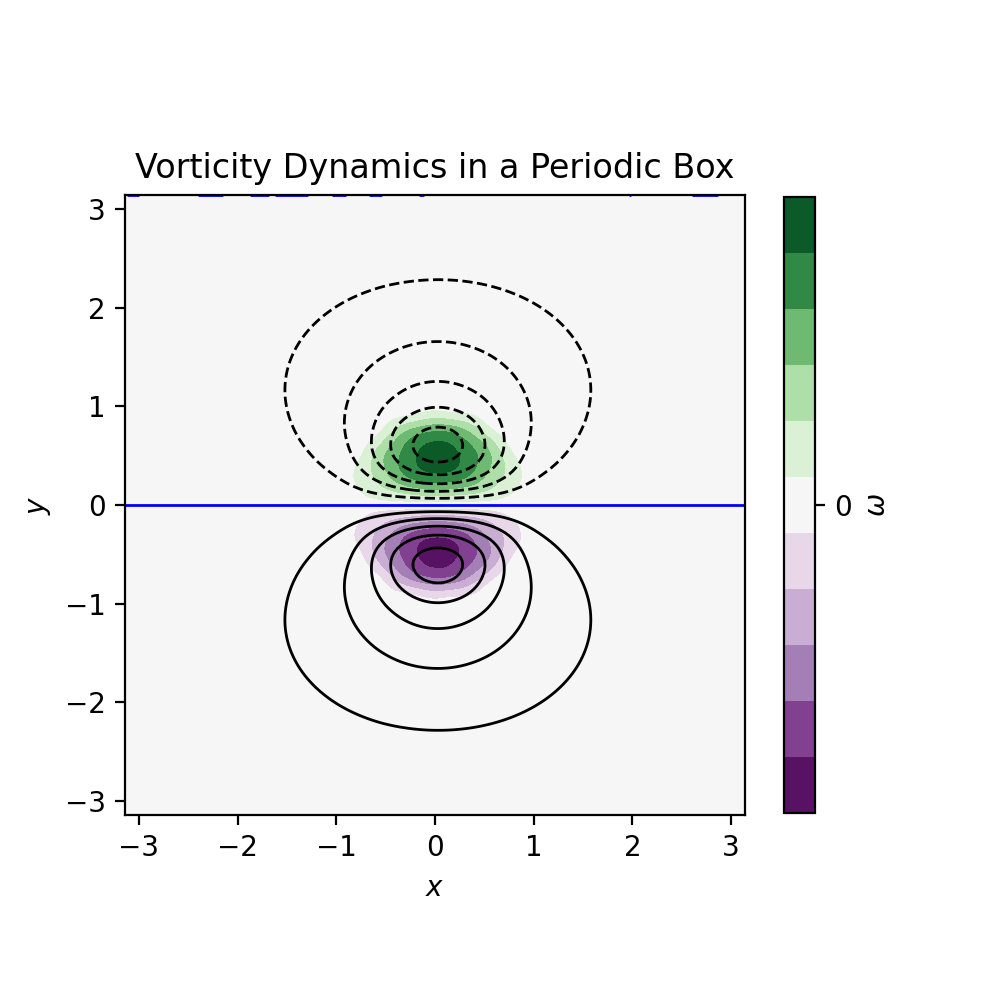

In [4]:
p = pathlib.Path("demo_output/lamb_dipole.gif")
b64 = base64.b64encode(p.read_bytes()).decode("ascii")
HTML(f'<img src="data:image/gif;base64,{b64}">')